In [1]:
SMALL_SIZE, MEDIUM_SIZE = 9, 12
PROJECT_PATH = "/Users/donghur/Desktop/Research/Murthy/BM_GPU"
# PROJECT_PATH = "/rapids/notebooks/host"

In [2]:
import sys
import numpy as np
from glob import glob
import random, matplotlib
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

sys.path.append(PROJECT_PATH)
from utils.data import Dataset


In [75]:
import utils.figure as ufigure
%load_ext autoreload
%autoreload 1
%aimport utils.data
%aimport utils.figure

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
Data = Dataset(PROJECT_PATH, 'final')
Data.load_data()

Loading INFO.yaml ...
Finished loading INFO
Loading config.yaml ...


  2%|▏         | 3/141 [00:00<00:05, 24.00it/s]

Finished loading config


100%|██████████| 141/141 [00:06<00:00, 23.23it/s]


In [6]:
# configuration
INFO = Data.info
INFO_values = Data.info_values
config = Data.config
skeleton = config['skeleton']
skeleton_color= config['skeleton_color']

# features
bp = Data.data_obj['bodypoints']
rot_bp = Data.data_obj['rotated_bodypoints']
angles = Data.data_obj['angles']
limbs = Data.data_obj['limbs']
angle_power = Data.data_obj['angle_power']
limb_power = Data.data_obj['limb_power']

# embeddings
all_embed = Data.data_obj['all_embeddings']
all_postural_embed = Data.data_obj['all_postural_embeddings']
all_kinematic_embed = Data.data_obj['all_kinematic_embeddings']

<hr><hr>

In [92]:
bad_fr, bad_bp, bad_ax = np.where(np.isnan(bp))

In [93]:
unique_bad_fr = np.unique(bad_fr)

In [95]:
len(unique_bad_fr)

174253

<hr><hr>

In [21]:
nan_fr, nan_bp, nan_ax = np.where(np.isnan(bp))
inf_fr, inf_bp, inf_ax = np.where(np.isinf(bp))

In [32]:
good_fr, good_ax = np.where(~np.isnan(bp[:,config['bp_center'],0:2]))
good_unique_fr = np.unique(good_fr)

In [31]:

bp[good_unique_fr,:,0:2] -= bp[good_unique_fr,config['bp_center'],0:2][:,np.newaxis,:]

array([   4991,    4992,    4993, ..., 1869436, 1869437, 1869438])

In [35]:
np.where(np.isnan(bp[good_unique_fr,config['bp_center'],0:2]))

(array([], dtype=int64), array([], dtype=int64))

<hr><hr>

In [114]:
num_fr,_,_ = bp.shape
DLC_data = np.copy(bp)


In [115]:
bp_axis = DLC_data[:,config['bp_scale'],0:2]
bad_fr, bad_bp, bad_ax = np.where(np.isnan(bp_axis))
unique_bad_fr = np.unique(bad_fr)

good_idx = np.array([True]*num_fr)
good_idx[unique_bad_fr] = False
good_bp_axis = bp_axis[good_idx,:,:]

x_d = good_bp_axis[0,0] - good_bp_axis[1,0]
y_d = good_bp_axis[0,1] - good_bp_axis[1,1]
dist = np.sqrt(x_d**2+y_d**2)
scale_factor = np.median(dist)
DLC_data[:,:,0:2] /= scale_factor

In [117]:
print(DLC_data.shape)
nan_fr,_,_ = np.where(np.isnan(DLC_data))
np.unique(nan_fr).shape

(1872138, 30, 3)


(174253,)

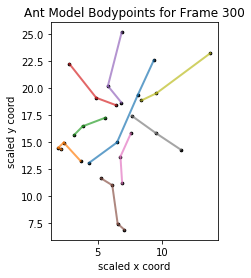

In [85]:
ufigure.ant_model(DLC_data,skeleton=config['skeleton'], 
                  skeleton_color=config['skeleton_color'],
                 fr=300)

<hr><hr>

In [94]:
from helper import _rotational

In [100]:
DLC_data[:,:,0:2], body_orientation = _rotational(data=DLC_data[:,:,0:2], axis_bp=config['bp_rotate'])


In [102]:
nan_fr,_,_ = np.where(np.isnan(DLC_data[:,:,0:2]))
np.unique(nan_fr).shape

(174253,)

In [103]:
data = DLC_data[:,:,0:2]
axis_bp = config['bp_rotate']

rot_data = np.copy(data)
num_bp = rot_data.shape[1]
axis_vector = rot_data[:,axis_bp,:]
angle_list = np.sign(axis_vector[:,0]) * np.pi/2 - np.arctan( axis_vector[:,1]/axis_vector[:,0] )

/Users/donghur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/Users/donghur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in true_divide
  import sys


In [113]:
nan_fr,= np.where(np.isnan(angle_list))
np.unique(nan_fr).shape

(52958,)

In [108]:
angle_list.shape

(1872138,)

In [110]:
nan_fr,_,_ = np.where(np.isnan(rot_data))
np.unique(nan_fr).shape

(174253,)